## 2. ML for Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 2.2 Data preparation

In [2]:
df = pd.read_csv('data/car_ddbb/data.csv')
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [3]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [4]:
df.columns = df.columns.str.upper().str.replace(' ', '_')

In [5]:
df.columns

Index(['MAKE', 'MODEL', 'YEAR', 'ENGINE_FUEL_TYPE', 'ENGINE_HP',
       'ENGINE_CYLINDERS', 'TRANSMISSION_TYPE', 'DRIVEN_WHEELS',
       'NUMBER_OF_DOORS', 'MARKET_CATEGORY', 'VEHICLE_SIZE', 'VEHICLE_STYLE',
       'HIGHWAY_MPG', 'CITY_MPG', 'POPULARITY', 'MSRP'],
      dtype='object')

In [6]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['MAKE',
 'MODEL',
 'ENGINE_FUEL_TYPE',
 'TRANSMISSION_TYPE',
 'DRIVEN_WHEELS',
 'MARKET_CATEGORY',
 'VEHICLE_SIZE',
 'VEHICLE_STYLE']

In [7]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [8]:
df.head()

MAKE       MODEL  YEAR             ENGINE_FUEL_TYPE  ENGINE_HP  \
0  bmw  1_series_m  2011  premium_unleaded_(required)      335.0   
1  bmw    1_series  2011  premium_unleaded_(required)      300.0   
2  bmw    1_series  2011  premium_unleaded_(required)      300.0   
3  bmw    1_series  2011  premium_unleaded_(required)      230.0   
4  bmw    1_series  2011  premium_unleaded_(required)      230.0   

   ENGINE_CYLINDERS TRANSMISSION_TYPE     DRIVEN_WHEELS  NUMBER_OF_DOORS  \
0               6.0            manual  rear_wheel_drive              2.0   
1               6.0            manual  rear_wheel_drive              2.0   
2               6.0            manual  rear_wheel_drive              2.0   
3               6.0            manual  rear_wheel_drive              2.0   
4               6.0            manual  rear_wheel_drive              2.0   

                         MARKET_CATEGORY VEHICLE_SIZE VEHICLE_STYLE  \
0  factory_tuner,luxury,high-performance      compact         coupe   
1                     luxury,performance      compact   convertible   
2                luxury,high-performance      compact         coupe   
3                     luxury,performance      compact         coupe   
4                                 luxury      compact   convertible   

   HIGHWAY_MPG  CITY_MPG  POPULARITY   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

### 2.3 Exploratory Data Analysis

In [9]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print("Number of unique values: ", df[col].nunique())
    print()
    print("-----------------")
    print()
    

MAKE
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
Number of unique values:  48

-----------------

MODEL
['1_series_m' '1_series' '100' '124_spider' '190-class']
Number of unique values:  914

-----------------

YEAR
[2011 2012 2013 1992 1993]
Number of unique values:  28

-----------------

ENGINE_FUEL_TYPE
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
Number of unique values:  10

-----------------

ENGINE_HP
[335. 300. 230. 320. 172.]
Number of unique values:  356

-----------------

ENGINE_CYLINDERS
[ 6.  4.  5.  8. 12.]
Number of unique values:  9

-----------------

TRANSMISSION_TYPE
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
Number of unique values:  5

-----------------

DRIVEN_WHEELS
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
Number of unique values:  4

-----------------

NUMBER_OF_DOORS
[ 2.  4.  3. nan]
Number of unique values:  3

-----

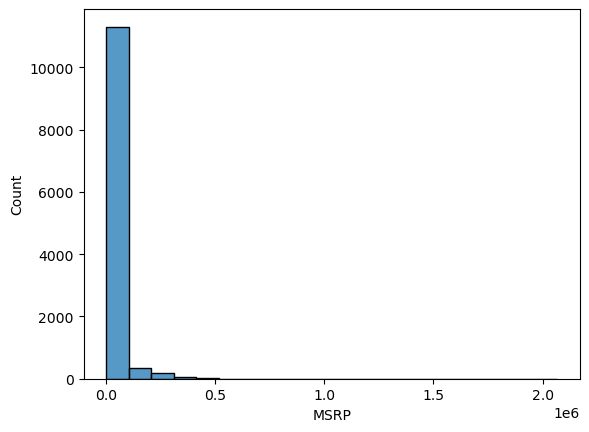

In [10]:
# Distribution of price - Long tail distribution
sns.histplot(df.MSRP, bins=20)
plt.show()

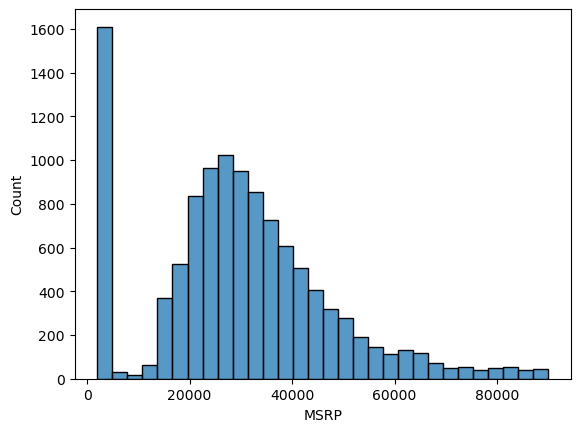

In [11]:
# Distribution of price
sns.histplot(df.MSRP[df.MSRP < 90000], bins=30)
plt.show()

In [16]:
price_logs = np.log1p(df.MSRP)

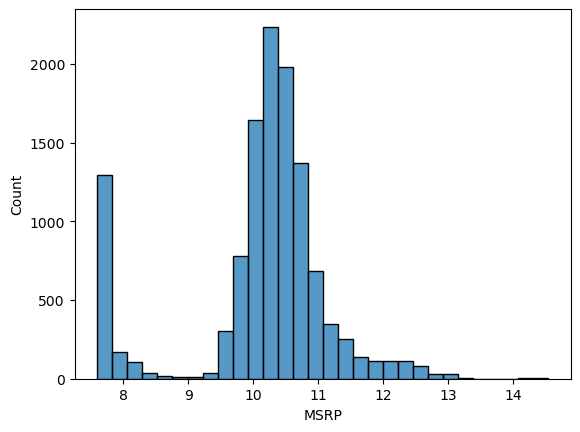

In [17]:
sns.histplot(price_logs, bins=30)
plt.show()

Null values

In [18]:
df.isnull().sum()

MAKE                    0
MODEL                   0
YEAR                    0
ENGINE_FUEL_TYPE        3
ENGINE_HP              69
ENGINE_CYLINDERS       30
TRANSMISSION_TYPE       0
DRIVEN_WHEELS           0
NUMBER_OF_DOORS         6
MARKET_CATEGORY      3742
VEHICLE_SIZE            0
VEHICLE_STYLE           0
HIGHWAY_MPG             0
CITY_MPG                0
POPULARITY              0
MSRP                    0
dtype: int64

### 2.3 Setting up the validation framework

In [24]:
n = df.shape[0]
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n, n_train + n_test +n_val

(11914, 11914)

In [27]:
df_train = df.iloc[:n_train]
df_test = df.iloc[n_train:n_train+n_test]
df_val = df.iloc[n_train+n_test:]


MAKE           MODEL  YEAR                ENGINE_FUEL_TYPE  \
9532   chevrolet  silverado_1500  2015                regular_unleaded   
9533   chevrolet  silverado_1500  2015        flex-fuel_(unleaded/e85)   
9534   chevrolet  silverado_1500  2015        flex-fuel_(unleaded/e85)   
9535   chevrolet  silverado_1500  2015        flex-fuel_(unleaded/e85)   
9536   chevrolet  silverado_1500  2015        flex-fuel_(unleaded/e85)   
...          ...             ...   ...                             ...   
11909      acura             zdx  2012     premium_unleaded_(required)   
11910      acura             zdx  2012     premium_unleaded_(required)   
11911      acura             zdx  2012     premium_unleaded_(required)   
11912      acura             zdx  2013  premium_unleaded_(recommended)   
11913    lincoln          zephyr  2006                regular_unleaded   

       ENGINE_HP  ENGINE_CYLINDERS TRANSMISSION_TYPE      DRIVEN_WHEELS  \
9532       355.0               8.0         automatic   rear_wheel_drive   
9533       285.0               6.0         automatic   rear_wheel_drive   
9534       285.0               6.0         automatic   rear_wheel_drive   
9535       285.0               6.0         automatic   rear_wheel_drive   
9536       285.0               6.0         automatic   rear_wheel_drive   
...          ...               ...               ...                ...   
11909      300.0               6.0         automatic    all_wheel_drive   
11910      300.0               6.0         automatic    all_wheel_drive   
11911      300.0               6.0         automatic    all_wheel_drive   
11912      300.0               6.0         automatic    all_wheel_drive   
11913      221.0               6.0         automatic  front_wheel_drive   

       NUMBER_OF_DOORS             MARKET_CATEGORY VEHICLE_SIZE  \
9532               4.0                         NaN        large   
9533               4.0                   flex_fuel        large   
9534               4.0                   flex_fuel        large   
9535               4.0                   flex_fuel        large   
9536               2.0                   flex_fuel        large   
...                ...                         ...          ...   
11909              4.0  crossover,hatchback,luxury      midsize   
11910              4.0  crossover,hatchback,luxury      midsize   
11911              4.0  crossover,hatchback,luxury      midsize   
11912              4.0  crossover,hatchback,luxury      midsize   
11913              4.0                      luxury      midsize   

             VEHICLE_STYLE  HIGHWAY_MPG  CITY_MPG  POPULARITY   MSRP  
9532       crew_cab_pickup           23        16        1385  47575  
9533   extended_cab_pickup           24        18        1385  31940  
9534       crew_cab_pickup           24        18        1385  38335  
9535   extended_cab_pickup           24        18        1385  35870  
9536    regular_cab_pickup           24        18        1385  28155  
...                    ...          ...       ...         ...    ...  
11909        4dr_hatchback           23        16         204  46120  
11910        4dr_hatchback           23        16         204  56670  
11911        4dr_hatchback           23        16         204  50620  
11912        4dr_hatchback           23        16         204  50920  
11913                sedan           26        17          61  28995  

[2382 rows x 16 columns]

In [29]:
# Shuffle the data
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_test = df.iloc[idx[n_train:n_train+n_test]]
df_val = df.iloc[idx[n_train+n_test:]]
df_train

MAKE        MODEL  YEAR                ENGINE_FUEL_TYPE  \
2735     chevrolet       cobalt  2008                regular_unleaded   
6720        toyota       matrix  2012                regular_unleaded   
5878        subaru      impreza  2016                regular_unleaded   
11190   volkswagen      vanagon  1991                regular_unleaded   
4554          ford        f-150  2017        flex-fuel_(unleaded/e85)   
...            ...          ...   ...                             ...   
434            bmw     4_series  2015     premium_unleaded_(required)   
1902    volkswagen       beetle  2015  premium_unleaded_(recommended)   
9334           gmc  sierra_1500  2015        flex-fuel_(unleaded/e85)   
5284   rolls-royce        ghost  2014     premium_unleaded_(required)   
2420    volkswagen           cc  2017  premium_unleaded_(recommended)   

       ENGINE_HP  ENGINE_CYLINDERS TRANSMISSION_TYPE      DRIVEN_WHEELS  \
2735       148.0               4.0            manual  front_wheel_drive   
6720       132.0               4.0         automatic  front_wheel_drive   
5878       148.0               4.0         automatic    all_wheel_drive   
11190       90.0               4.0            manual   rear_wheel_drive   
4554       385.0               8.0         automatic   four_wheel_drive   
...          ...               ...               ...                ...   
434        300.0               6.0         automatic   rear_wheel_drive   
1902       210.0               4.0  automated_manual  front_wheel_drive   
9334       285.0               6.0         automatic   four_wheel_drive   
5284       563.0              12.0         automatic   rear_wheel_drive   
2420       200.0               4.0  automated_manual  front_wheel_drive   

       NUMBER_OF_DOORS            MARKET_CATEGORY VEHICLE_SIZE  \
2735               2.0                        NaN      compact   
6720               4.0                  hatchback      compact   
5878               4.0                  hatchback      compact   
11190              3.0                        NaN        large   
4554               4.0                  flex_fuel        large   
...                ...                        ...          ...   
434                2.0         luxury,performance      midsize   
1902               2.0      hatchback,performance      compact   
9334               4.0                  flex_fuel        large   
5284               4.0  exotic,luxury,performance        large   
2420               4.0                performance      midsize   

             VEHICLE_STYLE  HIGHWAY_MPG  CITY_MPG  POPULARITY    MSRP  
2735                 coupe           33        24        1385   14410  
6720         4dr_hatchback           32        25        2031   19685  
5878         4dr_hatchback           37        28         640   19795  
11190    passenger_minivan           18        16         873    2000  
4554       crew_cab_pickup           21        15        5657   56260  
...                    ...          ...       ...         ...     ...  
434            convertible           31        20        3916   54900  
1902         2dr_hatchback           30        24         873   29215  
9334   extended_cab_pickup           22        17         549   34675  
5284                 sedan           21        13          86  303300  
2420                 sedan           31        22         873   37820  

[7150 rows x 16 columns]

In [30]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [32]:
# APPLY THE LOG TO MSRP
y_train = np.log1p(df_train.MSRP.values)
y_test = np.log1p(df_test.MSRP.values)
y_val = np.log1p(df_val.MSRP.values)


In [34]:
# DROP MSRP FROM TRAIN
df_train = df_train.drop(['MSRP'], axis=1)
df_test = df_test.drop(['MSRP'], axis=1)
df_val = df_val.drop(['MSRP'], axis=1)
df_train

MAKE        MODEL  YEAR                ENGINE_FUEL_TYPE  \
0       chevrolet       cobalt  2008                regular_unleaded   
1          toyota       matrix  2012                regular_unleaded   
2          subaru      impreza  2016                regular_unleaded   
3      volkswagen      vanagon  1991                regular_unleaded   
4            ford        f-150  2017        flex-fuel_(unleaded/e85)   
...           ...          ...   ...                             ...   
7145          bmw     4_series  2015     premium_unleaded_(required)   
7146   volkswagen       beetle  2015  premium_unleaded_(recommended)   
7147          gmc  sierra_1500  2015        flex-fuel_(unleaded/e85)   
7148  rolls-royce        ghost  2014     premium_unleaded_(required)   
7149   volkswagen           cc  2017  premium_unleaded_(recommended)   

      ENGINE_HP  ENGINE_CYLINDERS TRANSMISSION_TYPE      DRIVEN_WHEELS  \
0         148.0               4.0            manual  front_wheel_drive   
1         132.0               4.0         automatic  front_wheel_drive   
2         148.0               4.0         automatic    all_wheel_drive   
3          90.0               4.0            manual   rear_wheel_drive   
4         385.0               8.0         automatic   four_wheel_drive   
...         ...               ...               ...                ...   
7145      300.0               6.0         automatic   rear_wheel_drive   
7146      210.0               4.0  automated_manual  front_wheel_drive   
7147      285.0               6.0         automatic   four_wheel_drive   
7148      563.0              12.0         automatic   rear_wheel_drive   
7149      200.0               4.0  automated_manual  front_wheel_drive   

      NUMBER_OF_DOORS            MARKET_CATEGORY VEHICLE_SIZE  \
0                 2.0                        NaN      compact   
1                 4.0                  hatchback      compact   
2                 4.0                  hatchback      compact   
3                 3.0                        NaN        large   
4                 4.0                  flex_fuel        large   
...               ...                        ...          ...   
7145              2.0         luxury,performance      midsize   
7146              2.0      hatchback,performance      compact   
7147              4.0                  flex_fuel        large   
7148              4.0  exotic,luxury,performance        large   
7149              4.0                performance      midsize   

            VEHICLE_STYLE  HIGHWAY_MPG  CITY_MPG  POPULARITY  
0                   coupe           33        24        1385  
1           4dr_hatchback           32        25        2031  
2           4dr_hatchback           37        28         640  
3       passenger_minivan           18        16         873  
4         crew_cab_pickup           21        15        5657  
...                   ...          ...       ...         ...  
7145          convertible           31        20        3916  
7146        2dr_hatchback           30        24         873  
7147  extended_cab_pickup           22        17         549  
7148                sedan           21        13          86  
7149                sedan           31        22         873  

[7150 rows x 15 columns]

### 2.4 Linear Regression